![](https://raw.githubusercontent.com/Qinbf/tf-model-zoo/master/README_IMG/01.jpg)
AI MOOC： **www.ai-xlab.com**  
如果你也是AI爱好者，可以添加我的微信一起交流：**sdxxqbf**

In [ ]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt  

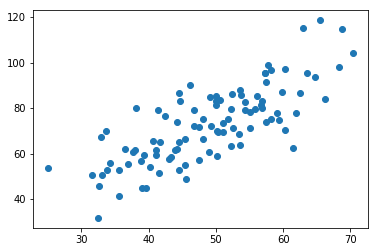

In [2]:
# 载入数据
data = np.genfromtxt("data.csv", delimiter=",")
x_data = data[:,0,np.newaxis]
y_data = data[:,1,np.newaxis]
plt.scatter(x_data,y_data)
plt.show()

In [3]:
print(np.mat(x_data).shape)
print(np.mat(y_data).shape)
# 给样本添加偏置项
X_data = np.concatenate((np.ones((100,1)),x_data),axis=1)
print(X_data.shape)

(100, 1)
(100, 1)
(100, 2)


In [4]:
print(X_data[:3])

[[ 1.         32.50234527]
 [ 1.         53.42680403]
 [ 1.         61.53035803]]


In [13]:
# 标准方程法求解回归参数
def weights(xArr, yArr):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    xTx = xMat.T*xMat # 矩阵乘法
    # 计算矩阵的值,如果值为0，说明该矩阵没有逆矩阵
    if np.linalg.det(xTx) == 0.0:
        print("This matrix cannot do inverse")
        return
    # xTx.I为xTx的逆矩阵
    ws = xTx.I*xMat.T*yMat
    return ws

In [14]:
ws = weights(X_data,y_data)
print(ws)

[[7.99102098]
 [1.32243102]]


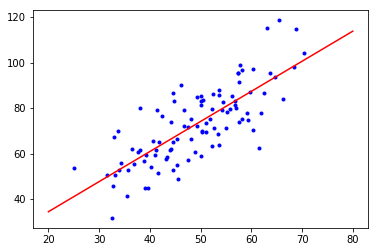

In [15]:
# 画图
x_test = np.array([[20],[80]])
y_test = ws[0] + x_test*ws[1]
plt.plot(x_data, y_data, 'b.')
plt.plot(x_test, y_test, 'r')
plt.show()